Data URL = https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'/Users/afni/Desktop/Portfolio projects/FlightPricePrediction/dataset/Clean_Dataset.csv')

In [4]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
data=data.drop('Unnamed: 0',axis=1)

In [7]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
data.shape

(300153, 11)

In [11]:
data.corr().T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [14]:
data1=data.groupby(['flight','airline'],as_index=False).count()
data1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

Indigo is the most popular Airline

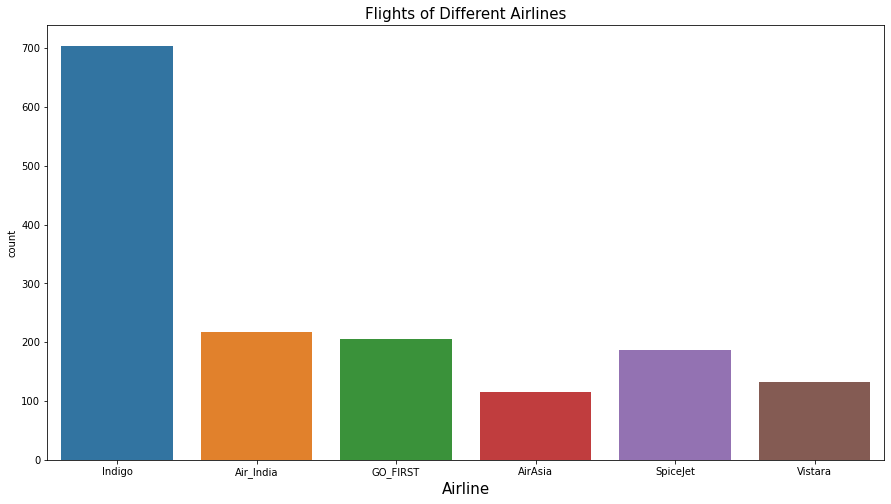

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(data1['airline'])
plt.title('Flights of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.show()

In [16]:
data2=data.groupby(['flight','airline','class'],as_index=False).count()
data2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

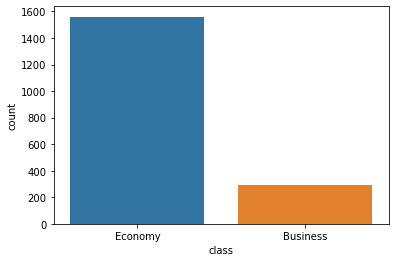

In [19]:
sns.countplot(data2['class'])

Most of the airlines has Economic class.

In [29]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## * Most Departure Time of the Airlines 

<AxesSubplot:>

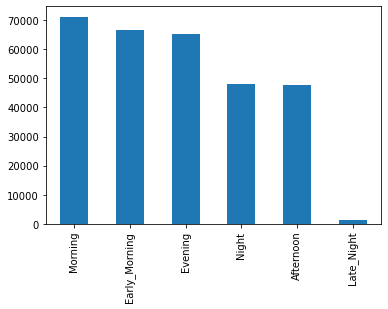

In [31]:
data['departure_time'].value_counts().plot(kind='bar')

### - Ticket price based on the Departure Time

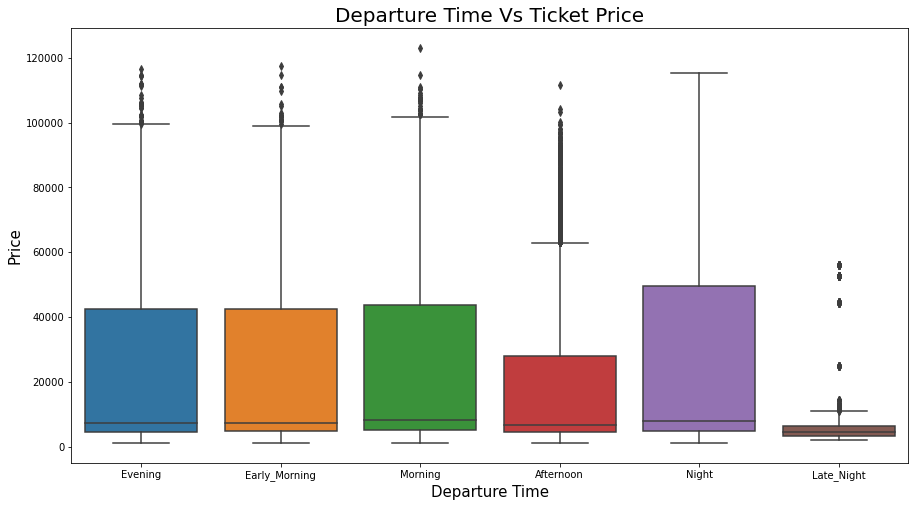

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(x='departure_time',y='price',data=data)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

- Ticket Price is More for the Flights when the Departure Time is at Night
- Ticket Price is Low for the Flights Having Departure Time at Late_night

## * Most Arrival Time of the Airlines 

<AxesSubplot:>

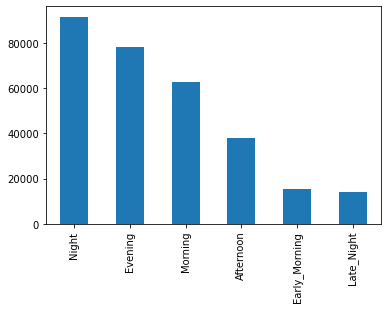

In [33]:
data['arrival_time'].value_counts().plot(kind='bar')

### - Ticket price based on the Arrival Time

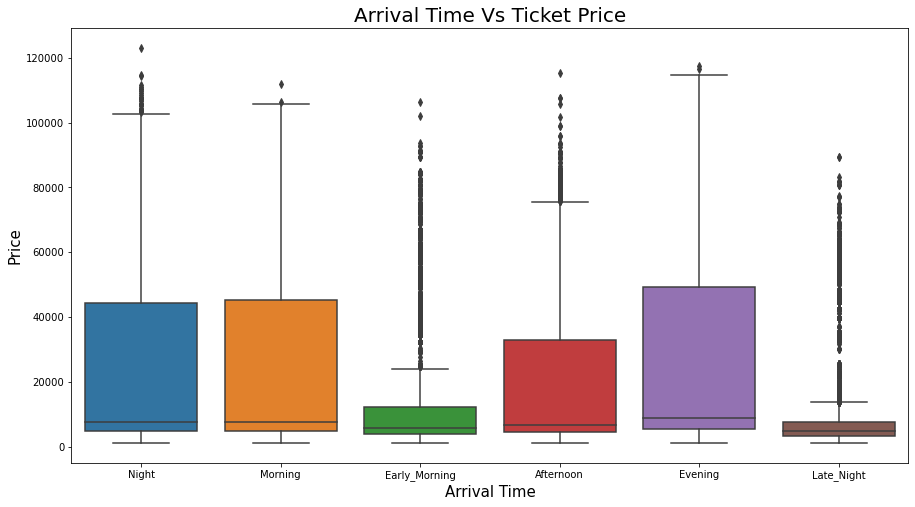

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(x='arrival_time',y='price',data=data)
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

- Ticket Price is More for the Flights when the Arrival Time is at Evening
- Ticket Price is Low for the Flights Having Arrival Time at Late_night

## Duration impacts on Price 

In [37]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


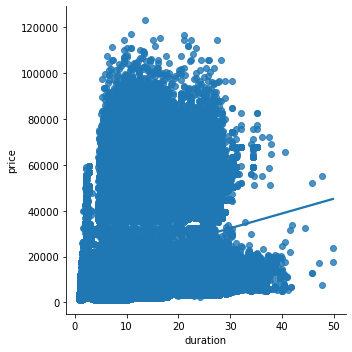

In [38]:
sns.lmplot(x='duration',y='price',data=data)

Pretty clear that, as the duration of hours increases, Flight price also increases.

## Average price from one city to another city

In [40]:
data['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [44]:
data.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10dd)


,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


## Separate categorical data & numerical data !
Categorical data are those whose data-type is 'object'

Numerical data are those whose data-type is either int of float

In [47]:
data.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [48]:
cat_col=[col for col in data.columns if data[col].dtype=='object']
num_col=[col for col in data.columns if data[col].dtype!='object']

In [49]:
cat_col

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [50]:
num_col

['duration', 'days_left', 'price']

## Handling Categorical Data
- I am using 2 basic Encoding Techniques to convert Categorical data into some numerical format
- If data belongs to Nominal data (ie data is not in any order) -->> OneHotEncoder is used in this case
- If data belongs to Ordinal data (ie data is in order ) -->>       LabelEncoder is used in this case

### One-hot encoding on 'source_city' feature !

In [51]:
data['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [52]:
data['source_city'].apply(lambda x: 1 if x=='Banglore' else 0)

0         0
1         0
2         0
3         0
4         0
         ..
300148    0
300149    0
300150    0
300151    0
300152    0
Name: source_city, Length: 300153, dtype: int64

In [53]:
for category in data['source_city'].unique():
    data['source_city_'+category]=data['source_city'].apply(lambda x: 1 if x==category else 0)

In [54]:
data.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_city_Delhi,source_city_Mumbai,source_city_Bangalore,source_city_Kolkata,source_city_Hyderabad,source_city_Chennai
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,1,0,0,0,0,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,1,0,0,0,0,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,0,0,0,0,0


## Performing Target Guided Mean Encoding !
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality in ML..
    lets use Target Guided Mean Encoding in order to get rid of this..

In [55]:
airlines=data.groupby(['airline'])['price'].mean().sort_values().index

In [56]:
airlines

Index(['AirAsia', 'Indigo', 'GO_FIRST', 'SpiceJet', 'Air_India', 'Vistara'], dtype='object', name='airline')

In [57]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [58]:
dict1

{'AirAsia': 0,
 'Indigo': 1,
 'GO_FIRST': 2,
 'SpiceJet': 3,
 'Air_India': 4,
 'Vistara': 5}

In [59]:
data['airline']=data['airline'].map(dict1)

In [60]:
data['airline']

0         3
1         3
2         0
3         5
4         5
         ..
300148    5
300149    5
300150    5
300151    5
300152    5
Name: airline, Length: 300153, dtype: int64

In [61]:
data.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_city_Delhi,source_city_Mumbai,source_city_Bangalore,source_city_Kolkata,source_city_Hyderabad,source_city_Chennai
0,3,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,1,0,0,0,0,0
1,3,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,1,0,0,0,0,0


In [62]:
data['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [63]:
dest=data.groupby(['destination_city'])['price'].mean().sort_values().index

In [64]:
dest

Index(['Delhi', 'Hyderabad', 'Mumbai', 'Bangalore', 'Chennai', 'Kolkata'], dtype='object', name='destination_city')

In [65]:
dict2={key:index for index,key in enumerate(dest,0)}
dict2

{'Delhi': 0,
 'Hyderabad': 1,
 'Mumbai': 2,
 'Bangalore': 3,
 'Chennai': 4,
 'Kolkata': 5}

In [67]:
data['destination_city']=data['destination_city'].map(dict2)
data['destination_city']

0         2
1         2
2         2
3         2
4         2
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: destination_city, Length: 300153, dtype: int64

In [68]:
data.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_city_Delhi,source_city_Mumbai,source_city_Bangalore,source_city_Kolkata,source_city_Hyderabad,source_city_Chennai
0,3,SG-8709,Delhi,Evening,zero,Night,2,Economy,2.17,1,5953,1,0,0,0,0,0
1,3,SG-8157,Delhi,Early_Morning,zero,Morning,2,Economy,2.33,1,5953,1,0,0,0,0,0


### Perform Manual Encoding on 'stops' feature

In [69]:
data['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [70]:
stops={'zero':0, 'one':1, 'two_or_more':2}

In [71]:
data['stops']=data['stops'].map(stops)

In [72]:
data['stops']

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

## Outlier Detection 

CAUSE FOR OUTLIERS
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

In [73]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

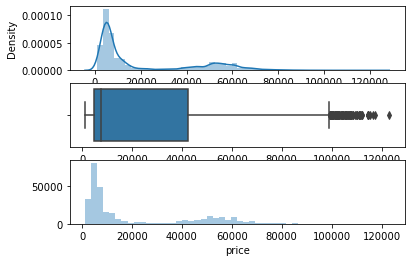

In [75]:
plot(data,'price')

In [76]:
data['price']=np.where(data['price']>=35000,data['price'].median(),data['price'])

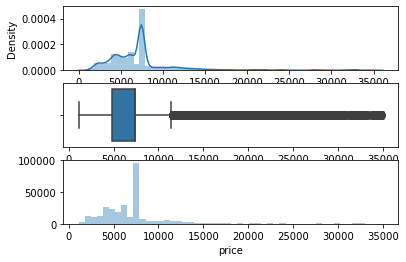

In [78]:
plot(data,'price')

## Coverting the labels into a numeric form using Label Encoder
Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

In [80]:
data.dtypes

airline                    int64
flight                    object
source_city               object
departure_time            object
stops                      int64
arrival_time              object
destination_city           int64
class                     object
duration                 float64
days_left                  int64
price                    float64
source_city_Delhi          int64
source_city_Mumbai         int64
source_city_Bangalore      int64
source_city_Kolkata        int64
source_city_Hyderabad      int64
source_city_Chennai        int64
dtype: object

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

In [84]:
# Storing the Dependent Variables in X and Independent Variable in Y
x=data.drop(['price'],axis=1)
y=data['price']

In [86]:
# Splitting the Data into Training set and Testing Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 16), (90046, 16), (210107,), (90046,))

In [87]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

### Random Forest Model
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. 
- For classification tasks, the output of the random forest is the class selected by most trees. 
- For regression tasks, the mean or average prediction of the individual trees is returned.

In [89]:
from sklearn.ensemble import RandomForestRegressor
ml_model=RandomForestRegressor()
model=ml_model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([7468.  , 7425.  , 7549.36, ..., 2980.75, 3201.35, 3471.1 ])

In [90]:
y_pred.shape

(90046,)

In [91]:
len(x_test)

90046

## Automate ML Pipeline 

In [96]:
def predict(ml_model):
    
    model=ml_model.fit(x_train,y_train)
    print('Training_score: {}'.format(model.score(x_train,y_train)))
    y_prediction=model.predict(x_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    

Training_score: 0.9869743111728598
Predictions are : [7399.9  7425.   7292.78 ... 2813.34 3218.9  3417.83]


r2_score: 0.8757947251042391
MSE :  2676852.526457815
MAE :  577.7715356747998
RMSE :  1636.108959225459


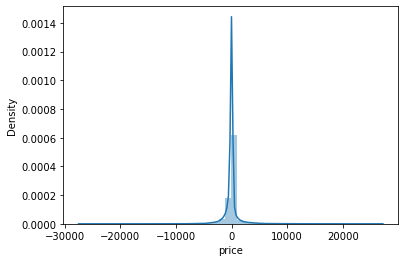

In [97]:
predict(RandomForestRegressor())